# Red Wine Quality Prediction Project
By ANKIT TIWARI

Batch - Batch DS2405

### Project Description
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

### Attribute Information
Input variables (based on physicochemical tests):
1. - fixed acidity
2. - volatile acidity
3. - citric acid
4. - residual sugar
5. - chlorides
6. - free sulfur dioxide
7. - total sulfur dioxide
8. - density
9. - pH
10. - sulphates
11. - alcohol

Output variable (based on sensory data):

12. - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.

This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model. 

### Inspiration

Use machine learning to determine which physiochemical properties make a wine 'good'!


### Dataset Link-
https://github.com/dsrscientist/dataset1/blob/master/winequality-red.csv

#### Importing libraries

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv('C:/Users/HP/OneDrive/Desktop/DESKTOP DATA/FLIP ROBO PRACTICE PROJECT/winequality-red.csv')
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

## Exploratory Data Analysis (EDA)


In [13]:
# checking the dimension of the dataset
df.shape

(1599, 12)

This dataset contains 1599 rows and 12 columns. Out of which 1 is the target variable `"quality"` and the remaining 11 are independent variables described in the above section _Attribute Information_.

In [12]:
# checking the types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [17]:
# checking the null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

* There are two different types of data (int64, and float) present in the dataset. 
* There is no null values.
* All the independent variables are represented as a number.

### Summary statistics 

In [97]:
# summary statistics of numerical columns
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

This give the statistical information of the numerical columns. There is not negative/invalid values present.

From the above description we can observe the following:
1. The counts of all the columns are the same which confirms there are no missing values in the dataset.
2. The mean value is greater than the median(50%) in 
    - 'fixed acidity',
    - 'residual sugar', 
    - 'chlorides',
    - 'free sulfur dioxide', 
    - 'total sulfur dioxide', 
    - 'sulphates',
    - 'alcohol'
    columns which means the data is skewed to right in these columns.
3. The mean and the median are almost the same in the following columns:
    - 'volatile acidity', 
    - 'citric acid', 
    - 'density', 
    - 'pH', 
    which means they are normally distributed.

4. Considering there is a significant difference between the maximum value and the third percentile Q2, we must investigate the existence of outliers in the data. In columns: 
    - 'chlorides',
    - 'free sulfur dioxide', 
    - 'total sulfur dioxide', 
    - and 'sulphates'. 
 
5. The residual sugar in the wine varies between 0.9 and 15.5, with an average of 2.53. 
6. Total sulpher dioxide varies between 6.0 to 289.0. Which maximum value is very high compared to the average 46.46.
7. The average density of wine is 0.9956.
8. The pH level of wine varies between 2.74 to 4.01.
9. The maximum alcohol level in the wine is 14.9 and minimum is 8.4
10. The quality of wine varies from 3 to 8, where 6 is the average quality.
11. We can also review the Standard deviation, which tell us how disperse the data is.

In [35]:
# Checking number of unique values in each column
df.nunique().to_frame("No. of unique values")

No. of unique values
fixed acidity                           96
volatile acidity                       143
citric acid                             80
residual sugar                          91
chlorides                              153
free sulfur dioxide                     60
total sulfur dioxide                   144
density                                436
pH                                      89
sulphates                               96
alcohol                                 65
quality                                  6

These are the unique values presents in the dataset.

In [36]:
# Reviewing the values in quality (target)
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Since the output variable `quality` presents 6 unique values in 1599 records, this is a classification problem. As we can see the dataset is not balanced since there are significant differences between the number of records from outputs 3, 4, and 8 compared to the number of records from outputs 5, and 6.

In [50]:
# Checking the value counts of each column (independent variables)
for i in range(11):
    display(df.iloc[:,i].value_counts())

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64

0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64

0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64

2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64

0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64

6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0     60
11.0     59
13.0     57
8.0      56
14.0     50
3.0      49
18.0     46
4.0      41
21.0     41
19.0     39
24.0     34
26.0     32
23.0     32
20.0     30
27.0     29
25.0     24
29.0     23
28.0     23
22.0     22
32.0     22
31.0     20
34.0     18
30.0     16
35.0     15
36.0     11
33.0     11
38.0      9
41.0      7
40.0      6
39.0      5
48.0      4
51.0      4
45.0      3
1.0       3
43.0      3
42.0      3
52.0      3
37.0      3
68.0      2
55.0      2
50.0      2
37.5      2
53.0      1
72.0      1
57.0      1
47.0      1
5.5       1
2.0       1
46.0      1
54.0      1
40.5      1
66.0      1
Name: free sulfur dioxide, dtype: int64

28.0     43
24.0     36
15.0     35
18.0     35
23.0     34
         ..
139.0     1
149.0     1
152.0     1
155.0     1
165.0     1
Name: total sulfur dioxide, Length: 144, dtype: int64

0.99720    36
0.99680    35
0.99760    35
0.99800    29
0.99620    28
           ..
0.99684     1
0.99764     1
0.99473     1
0.99320     1
0.99651     1
Name: density, Length: 436, dtype: int64

3.30    57
3.36    56
3.26    53
3.38    48
3.39    48
        ..
3.75     1
2.74     1
3.70     1
3.85     1
2.90     1
Name: pH, Length: 89, dtype: int64

0.60    69
0.58    68
0.54    68
0.62    61
0.56    60
        ..
1.00     1
1.59     1
0.33     1
1.26     1
1.01     1
Name: sulphates, Length: 96, dtype: int64

9.500000     139
9.400000     103
9.800000      78
9.200000      72
10.000000     67
            ... 
9.950000       1
9.233333       1
9.250000       1
9.050000       1
10.750000      1
Name: alcohol, Length: 65, dtype: int64

## Data Visualization
You can observe the separate visualizations of the data normally distributed from the data with skewed distribution to confirm the analysis of the statistical summary.
The `kde=True` parameter was set in order to clearly show the curve.

#### Univariate Analysis

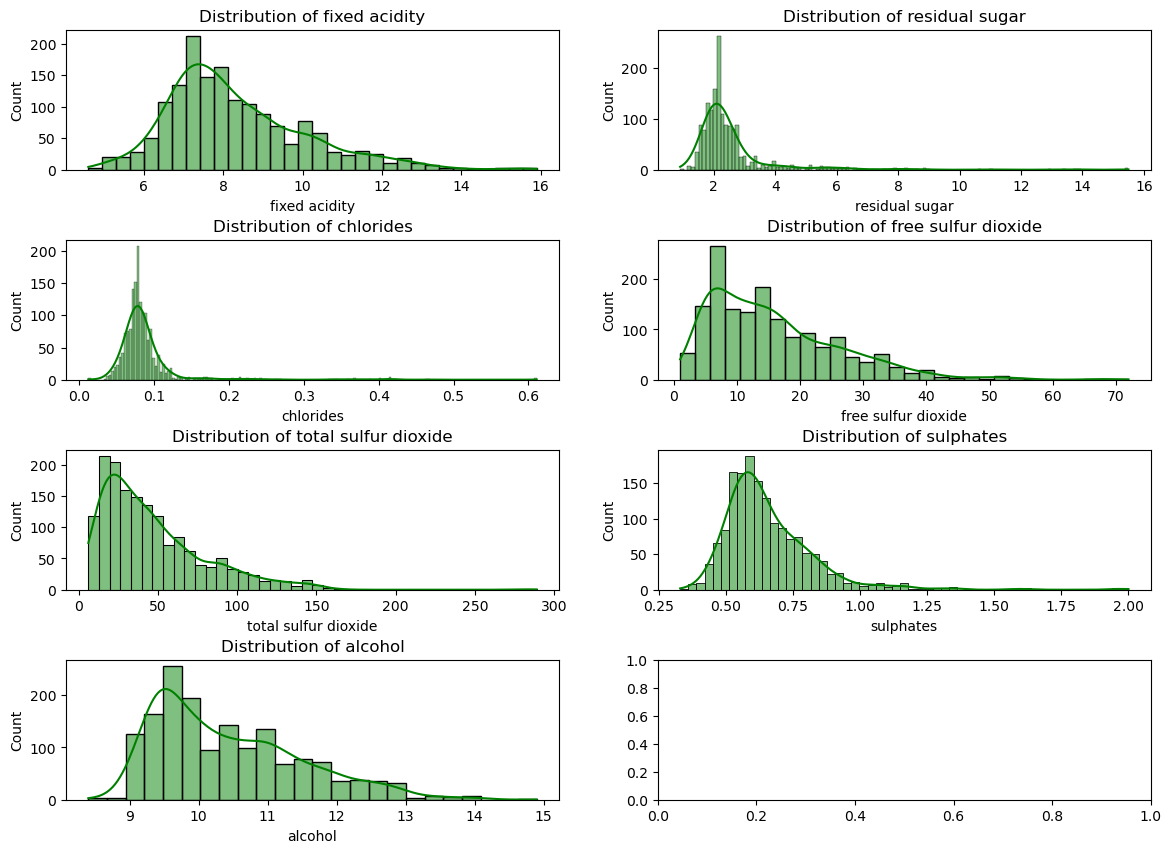

In [101]:
# Visualizing the distribution of the columns with the mean > median -> right skewed data
col_right_skewed = ['fixed acidity','residual sugar', 'chlorides','free sulfur dioxide','total sulfur dioxide','sulphates', 'alcohol' ]

fig, axs = plt.subplots(4, 2, figsize=(14, 10))
for ax, column in zip(axs.flat, col_right_skewed):
    sns.histplot(data=df, x=column, ax=ax, kde=True, color='g')
    ax.set_title(f"Distribution of {column}")

plt.subplots_adjust(hspace=0.5)
plt.show()

As we mentioned before the data of the columns 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', and 'sulphates'  is highly skewed to the right.  Skewed data can affect the performance of the machine learning models so we are going to transform it.

The columns 'fixed acidity' and 'alcohol' are slightly skewed towards the right.

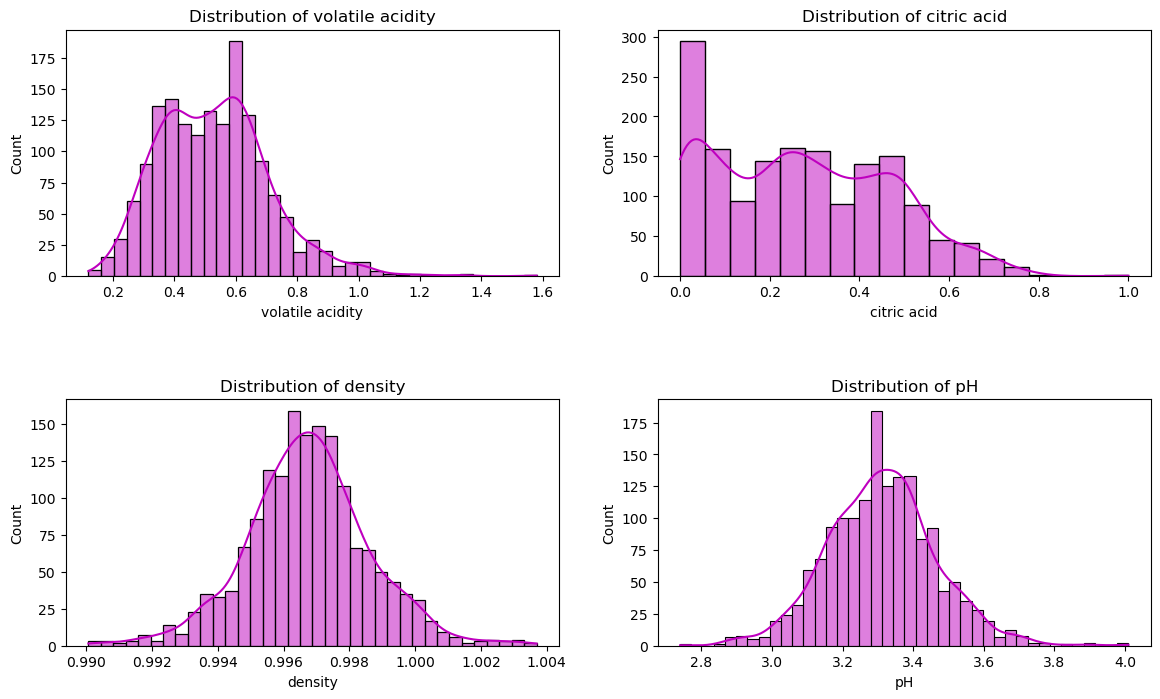

In [102]:
# Visualizing the distribution of the columns with similar mean == median -> aprox. normally distributed
col_normal_dist = ['volatile acidity','citric acid','density','pH']

fig, axs = plt.subplots(2, 2, figsize=(14, 8))
for ax, column in zip(axs.flat, col_normal_dist):
    sns.histplot(data=df, x=column, ax=ax, kde=True, color='m')
    ax.set_title(f"Distribution of {column}")

plt.subplots_adjust(hspace=0.5)
plt.show()

And the data of the columns 'volatile acidity','citric acid','chlorides','density', and 'pH' is almost normally distributed.

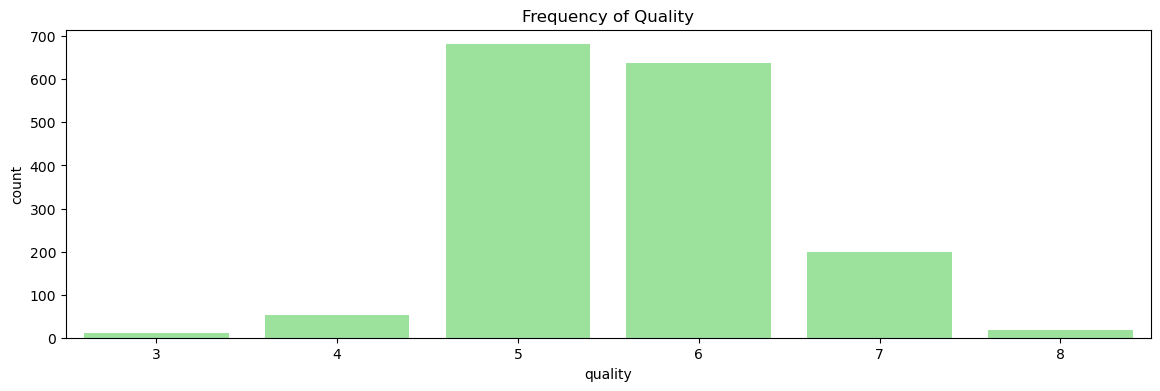

In [157]:
# Visualizing the Frequency of quality
plt.figure(figsize = (14, 4), facecolor = "white")
sns.countplot(data=df, x='quality', color='lightgreen')
plt.title(f"Frequency of Quality")
plt.show()

In the Frequency plot, we can observe the dataset is imbalanced. There are significantly more records for wine quality 5 and 6 compared to the cases of quality 3, 4, and 8.  So we will rectify it by using the oversampling method in the later part.

#### Bivariate Analysis

Performing a bivariate analysis so we can understand how variables interact and obtain insights into patterns, correlations, and dependencies. We are going to compare each independent variable with the target variable `'quantity'`.
Since we are comparing numerical variables with a categorical variable (target) we can use box plots, violin plots, or swarm plots to visualize the distribution of numerical values within each category, in our case we are using box plots.

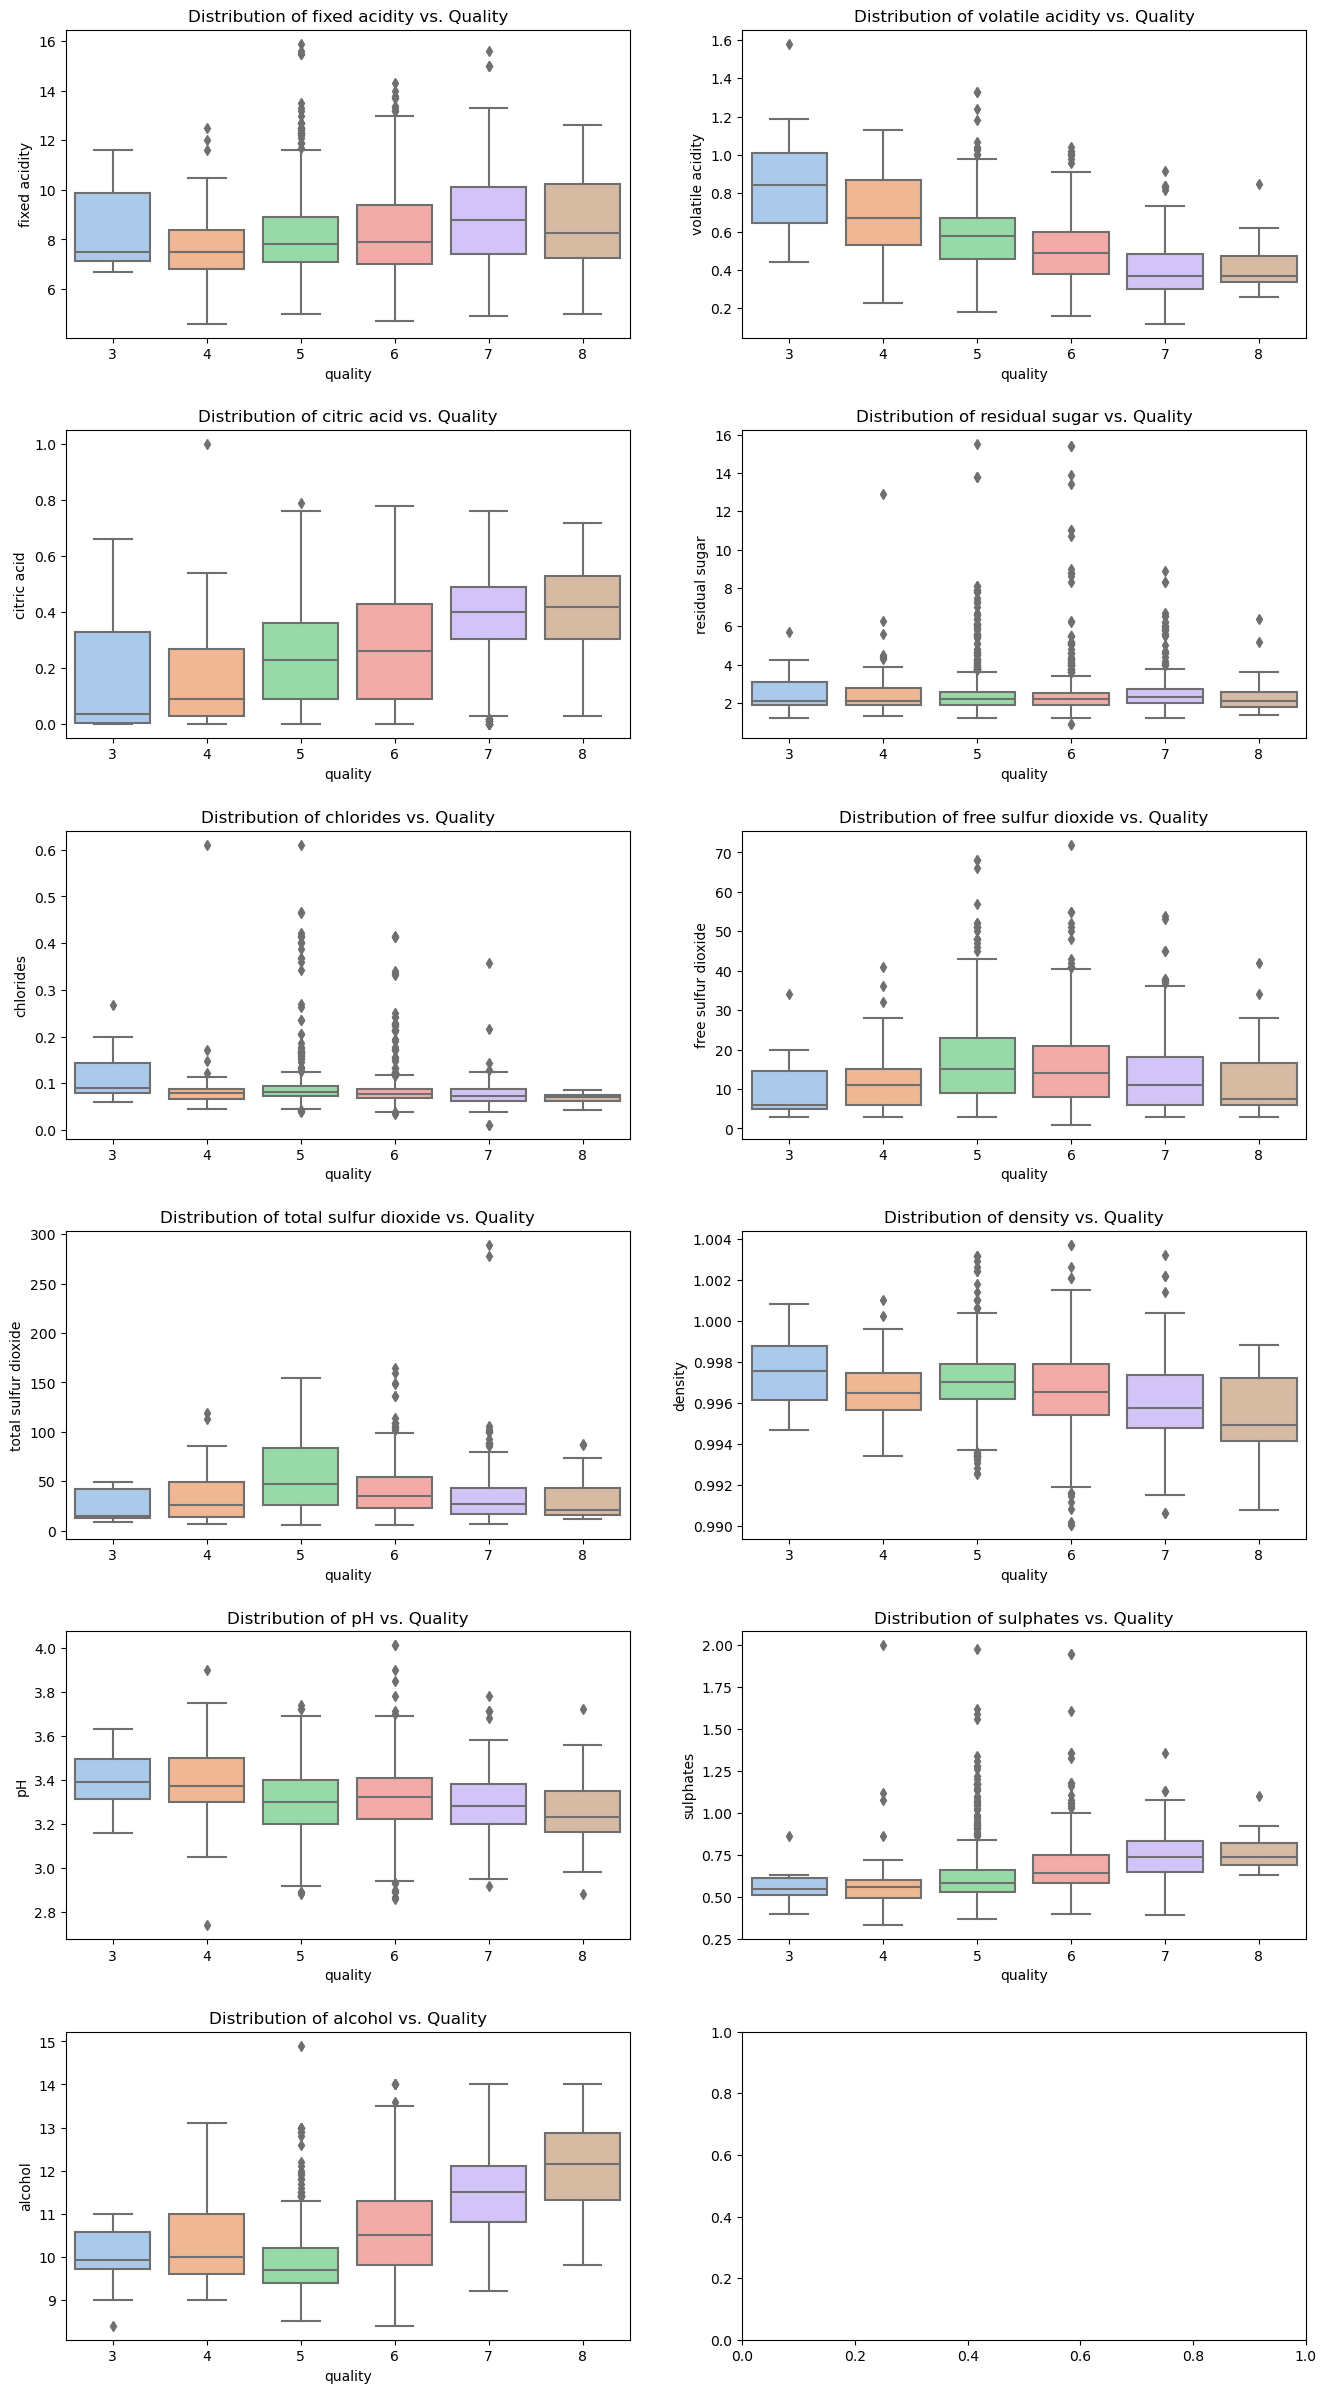

In [160]:
# Visualizing and comparing each independent variable with quality
# setting the palette for the visualizations
sns.set_palette('pastel')

fig, axs = plt.subplots(6, 2, figsize=(16, 30))
for ax, column in zip(axs.flat, df.columns[:-1]):
    sns.boxplot(data=df, y=column, x="quality", ax=ax)
    ax.set_title(f"Distribution of {column} vs. Quality")

plt.subplots_adjust(hspace=0.3)
plt.show()

- We can observe there are outliers in almost each independent variable, with the exception in the `citric acid`.
- Considering that the best rated wines obtained a rating greater than or equal to 5, we can note that the `"volatile acidity"` variable is on average lower as the `quality` of the wine increases. The same happens with the `pH` but the variation is less noticeable.
- The opposite happens with the average concentration of `"citric acid"` and `"alcohol"` which increases as the quality of the  wine increases as well.
- With the other variables the variation is almost imperceptible.


#### Removing the outliers

In [187]:
from scipy.stats import zscore

z = np.abs(zscore(df))
z

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.485308          0.961877     1.391472        0.583150   0.218763   
1          0.221230          1.967442     1.391472        0.294627   0.558443   
2          0.221230          1.297065     1.186070        0.048478   0.365302   
3          1.593621          1.384443     1.484154        0.583150   0.259254   
4          0.485308          0.961877     1.391472        0.583150   0.218763   
...             ...               ...          ...             ...        ...   
1594       1.372847          0.403229     0.980669        0.439605   0.298111   
1595       1.621641          0.123905     0.877968        0.172877   0.841175   
1596       1.292584          0.099554     0.723916        0.048478   0.218763   
1597       1.621641          0.654620     0.775267        0.439605   0.259254   
1598       1.537331          1.216849     1.021999        1.205329   0.604076   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0                0.323303              0.217554  0.558274  1.288643   
1                0.983836              0.813317  0.028261  0.719933   
2                0.129002              0.459903  0.134264  0.331177   
3                0.325192              0.629351  0.664277  0.979104   
4                0.323303              0.217554  0.558274  1.288643   
...                   ...                   ...       ...       ...   
1594             1.452110              0.147087  0.978765  0.899886   
1595             1.856199              0.370437  0.862162  1.353436   
1596             1.260746              0.008628  0.533554  0.705508   
1597             1.452110              0.147087  0.676657  1.677400   
1598             0.417546              0.078957  0.666057  0.511130   

      sulphates   alcohol   quality  
0      0.602062  0.994360  0.787823  
1      0.266658  0.572864  0.787823  
2      0.064774  0.572864  0.787823  
3      0.445052  0.572864  0.450848  
4      0.602062  0.994360  0.787823  
...         ...       ...       ...  
1594   0.445052  0.124960  0.787823  
1595   0.764320  0.777732  0.450848  
1596   0.705056  0.595484  0.450848  
1597   0.459825  0.168232  0.787823  
1598   0.133086  0.595484  0.450848  

[1599 rows x 12 columns]

In [274]:
df_new = df[(z.iloc[:,:11]<3).all(axis=1)]

print(f"{df.shape[0] - df_new.shape[0]} rows with outliers were deleted.")
print(f"This represent {round((df.shape[0] - df_new.shape[0]) / df.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df.shape[1]} columns.")
df = df_new
df

109 rows with outliers were deleted.
This represent 6.82% of the data.
In the new dataset there are 1490 rows and 12 columns 


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          2.001480             0.700         0.00        0.641854  -2.577022   
1          2.054124             0.880         0.00        0.955511  -2.322788   
2          2.054124             0.760         0.04        0.832909  -2.385967   
3          2.415914             0.280         0.56        0.641854  -2.590267   
4          2.001480             0.700         0.00        0.641854  -2.577022   
...             ...               ...          ...             ...        ...   
1594       1.824549             0.600         0.08        0.693147  -2.407946   
1595       1.774952             0.550         0.10        0.788457  -2.780621   
1596       1.840550             0.510         0.13        0.832909  -2.577022   
1597       1.774952             0.645         0.12        0.693147  -2.590267   
1598       1.791759             0.310         0.47        1.280934  -2.703063   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                2.223980              3.239612  0.99780  3.51  -0.579818   
1                2.924018              4.061548  0.99680  3.20  -0.385662   
2                2.466212              3.779763  0.99700  3.26  -0.430783   
3                2.571282              3.914868  0.99800  3.16  -0.544727   
4                2.223980              3.239612  0.99780  3.51  -0.579818   
...                   ...                   ...      ...   ...        ...   
1594             3.174802              3.530348  0.99490  3.45  -0.544727   
1595             3.391211              3.708430  0.99512  3.52  -0.274437   
1596             3.072317              3.419952  0.99574  3.42  -0.287682   
1597             3.174802              3.530348  0.99547  3.57  -0.342490   
1598             2.620741              3.476027  0.99549  3.39  -0.415515   

       alcohol  quality  
0     2.240710        5  
1     2.282382        5  
2     2.282382        5  
3     2.282382        6  
4     2.240710        5  
...        ...      ...  
1594  2.351375        5  
1595  2.415914        6  
1596  2.397895        6  
1597  2.322388        5  
1598  2.397895        6  

[1490 rows x 12 columns]

#### Checking for skewness

In [275]:
# Cheking the skewness of the data 
    df.skew().sort_values(ascending=False)

residual sugar          1.212047
alcohol                 0.586710
chlorides               0.421561
sulphates               0.419503
fixed acidity           0.409551
volatile acidity        0.388471
total sulfur dioxide    0.368846
citric acid             0.293456
quality                 0.263181
free sulfur dioxide     0.200228
pH                      0.097632
density                 0.064629
dtype: float64

Considering that the skewness of the columns: 
* residual sugar          1.212047
* alcohol                 0.586710

is greater than 0.5, we are going to apply methods to remove it

#### Removing skewness
Let's use the cuberoot method first and check the skewness

In [282]:
# Removing skewness using cuberoot method
df_process = pd.DataFrame(data=df)
df_process['residual sugar'] = np.cbrt(df['residual sugar'])
df_process['alcohol'] = np.cbrt(df['alcohol'])

In [283]:
# Cheking the skewness of the data 
df_process.skew().sort_values(ascending=False)

alcohol                 0.540839
chlorides               0.421561
sulphates               0.419503
fixed acidity           0.409551
volatile acidity        0.388471
total sulfur dioxide    0.368846
residual sugar          0.324153
citric acid             0.293456
quality                 0.263181
free sulfur dioxide     0.200228
pH                      0.097632
density                 0.064629
dtype: float64

We are going to use the Log Transformation for the columns the skewness remains > 0.5

In [292]:
# Removing skewness using Log transformation
df_process['alcohol'] = np.log(df_process['alcohol'])

In [293]:
# Cheking the skewness of the data 
df_process.skew().sort_values(ascending=False)

alcohol                 0.440077
chlorides               0.421561
sulphates               0.419503
fixed acidity           0.409551
volatile acidity        0.388471
total sulfur dioxide    0.368846
residual sugar          0.324153
citric acid             0.293456
quality                 0.263181
free sulfur dioxide     0.200228
pH                      0.097632
density                 0.064629
dtype: float64

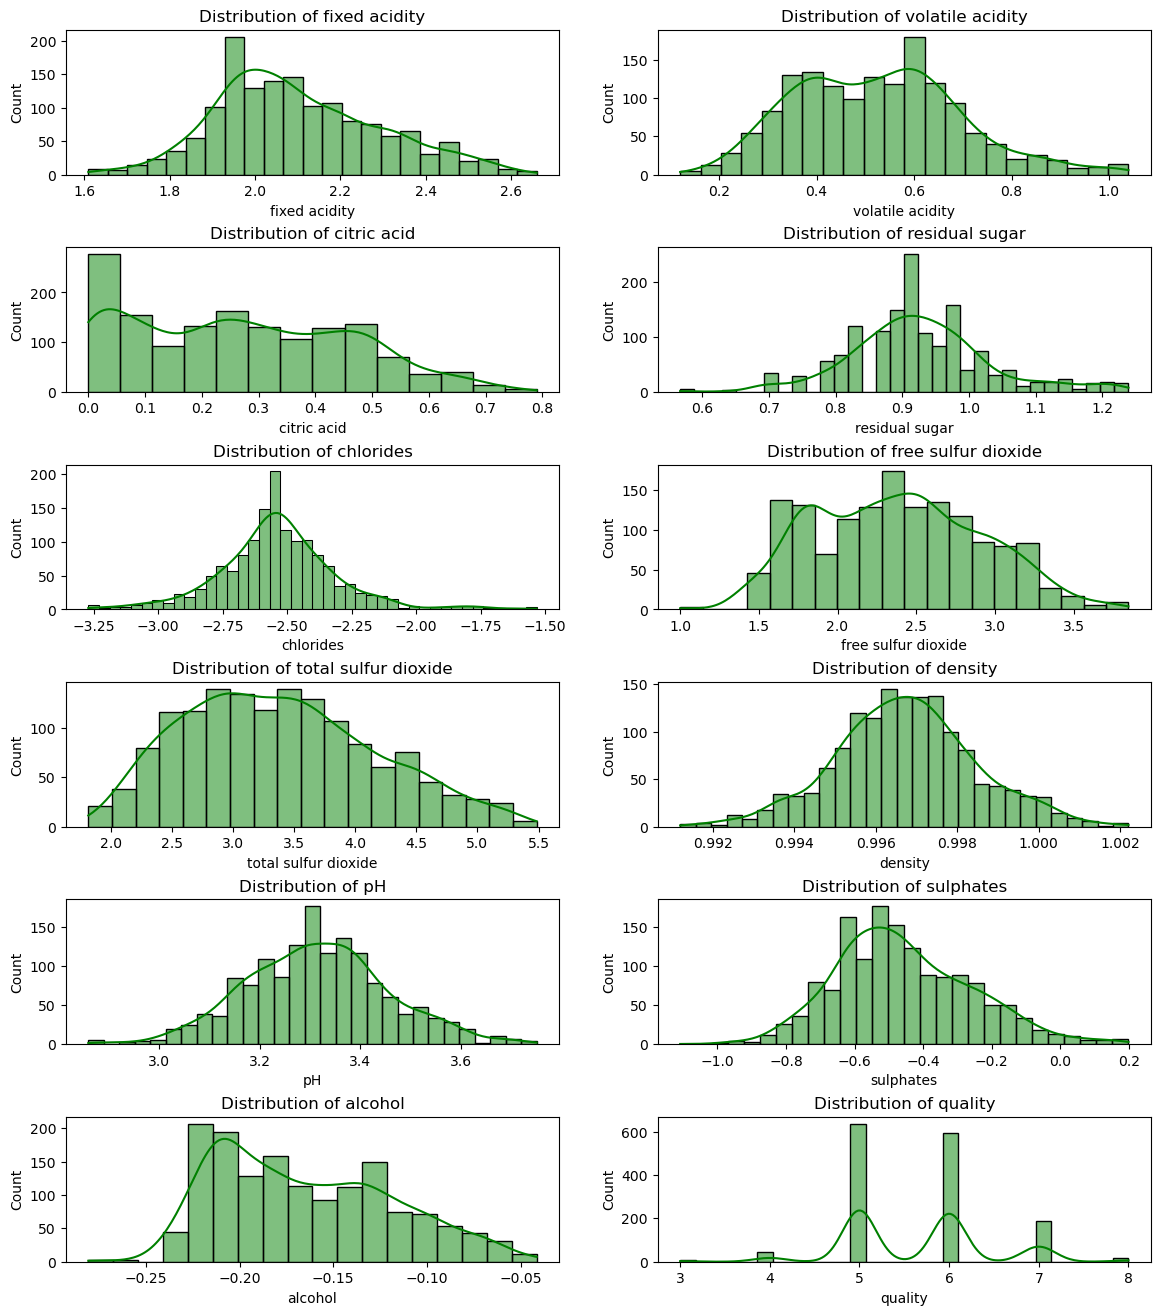

In [294]:
fig, axs = plt.subplots(6, 2, figsize=(14, 16))
for ax, column in zip(axs.flat, df_process.columns):
    sns.histplot(data=df_process, x=column, ax=ax, kde=True, color='g')
    ax.set_title(f"Distribution of {column}")

plt.subplots_adjust(hspace=0.5)
plt.show()

All features are normally distributed. 

In [297]:
# Asigning the transform data to the principal dataset
df = df_process

#### Multivariate Analysis

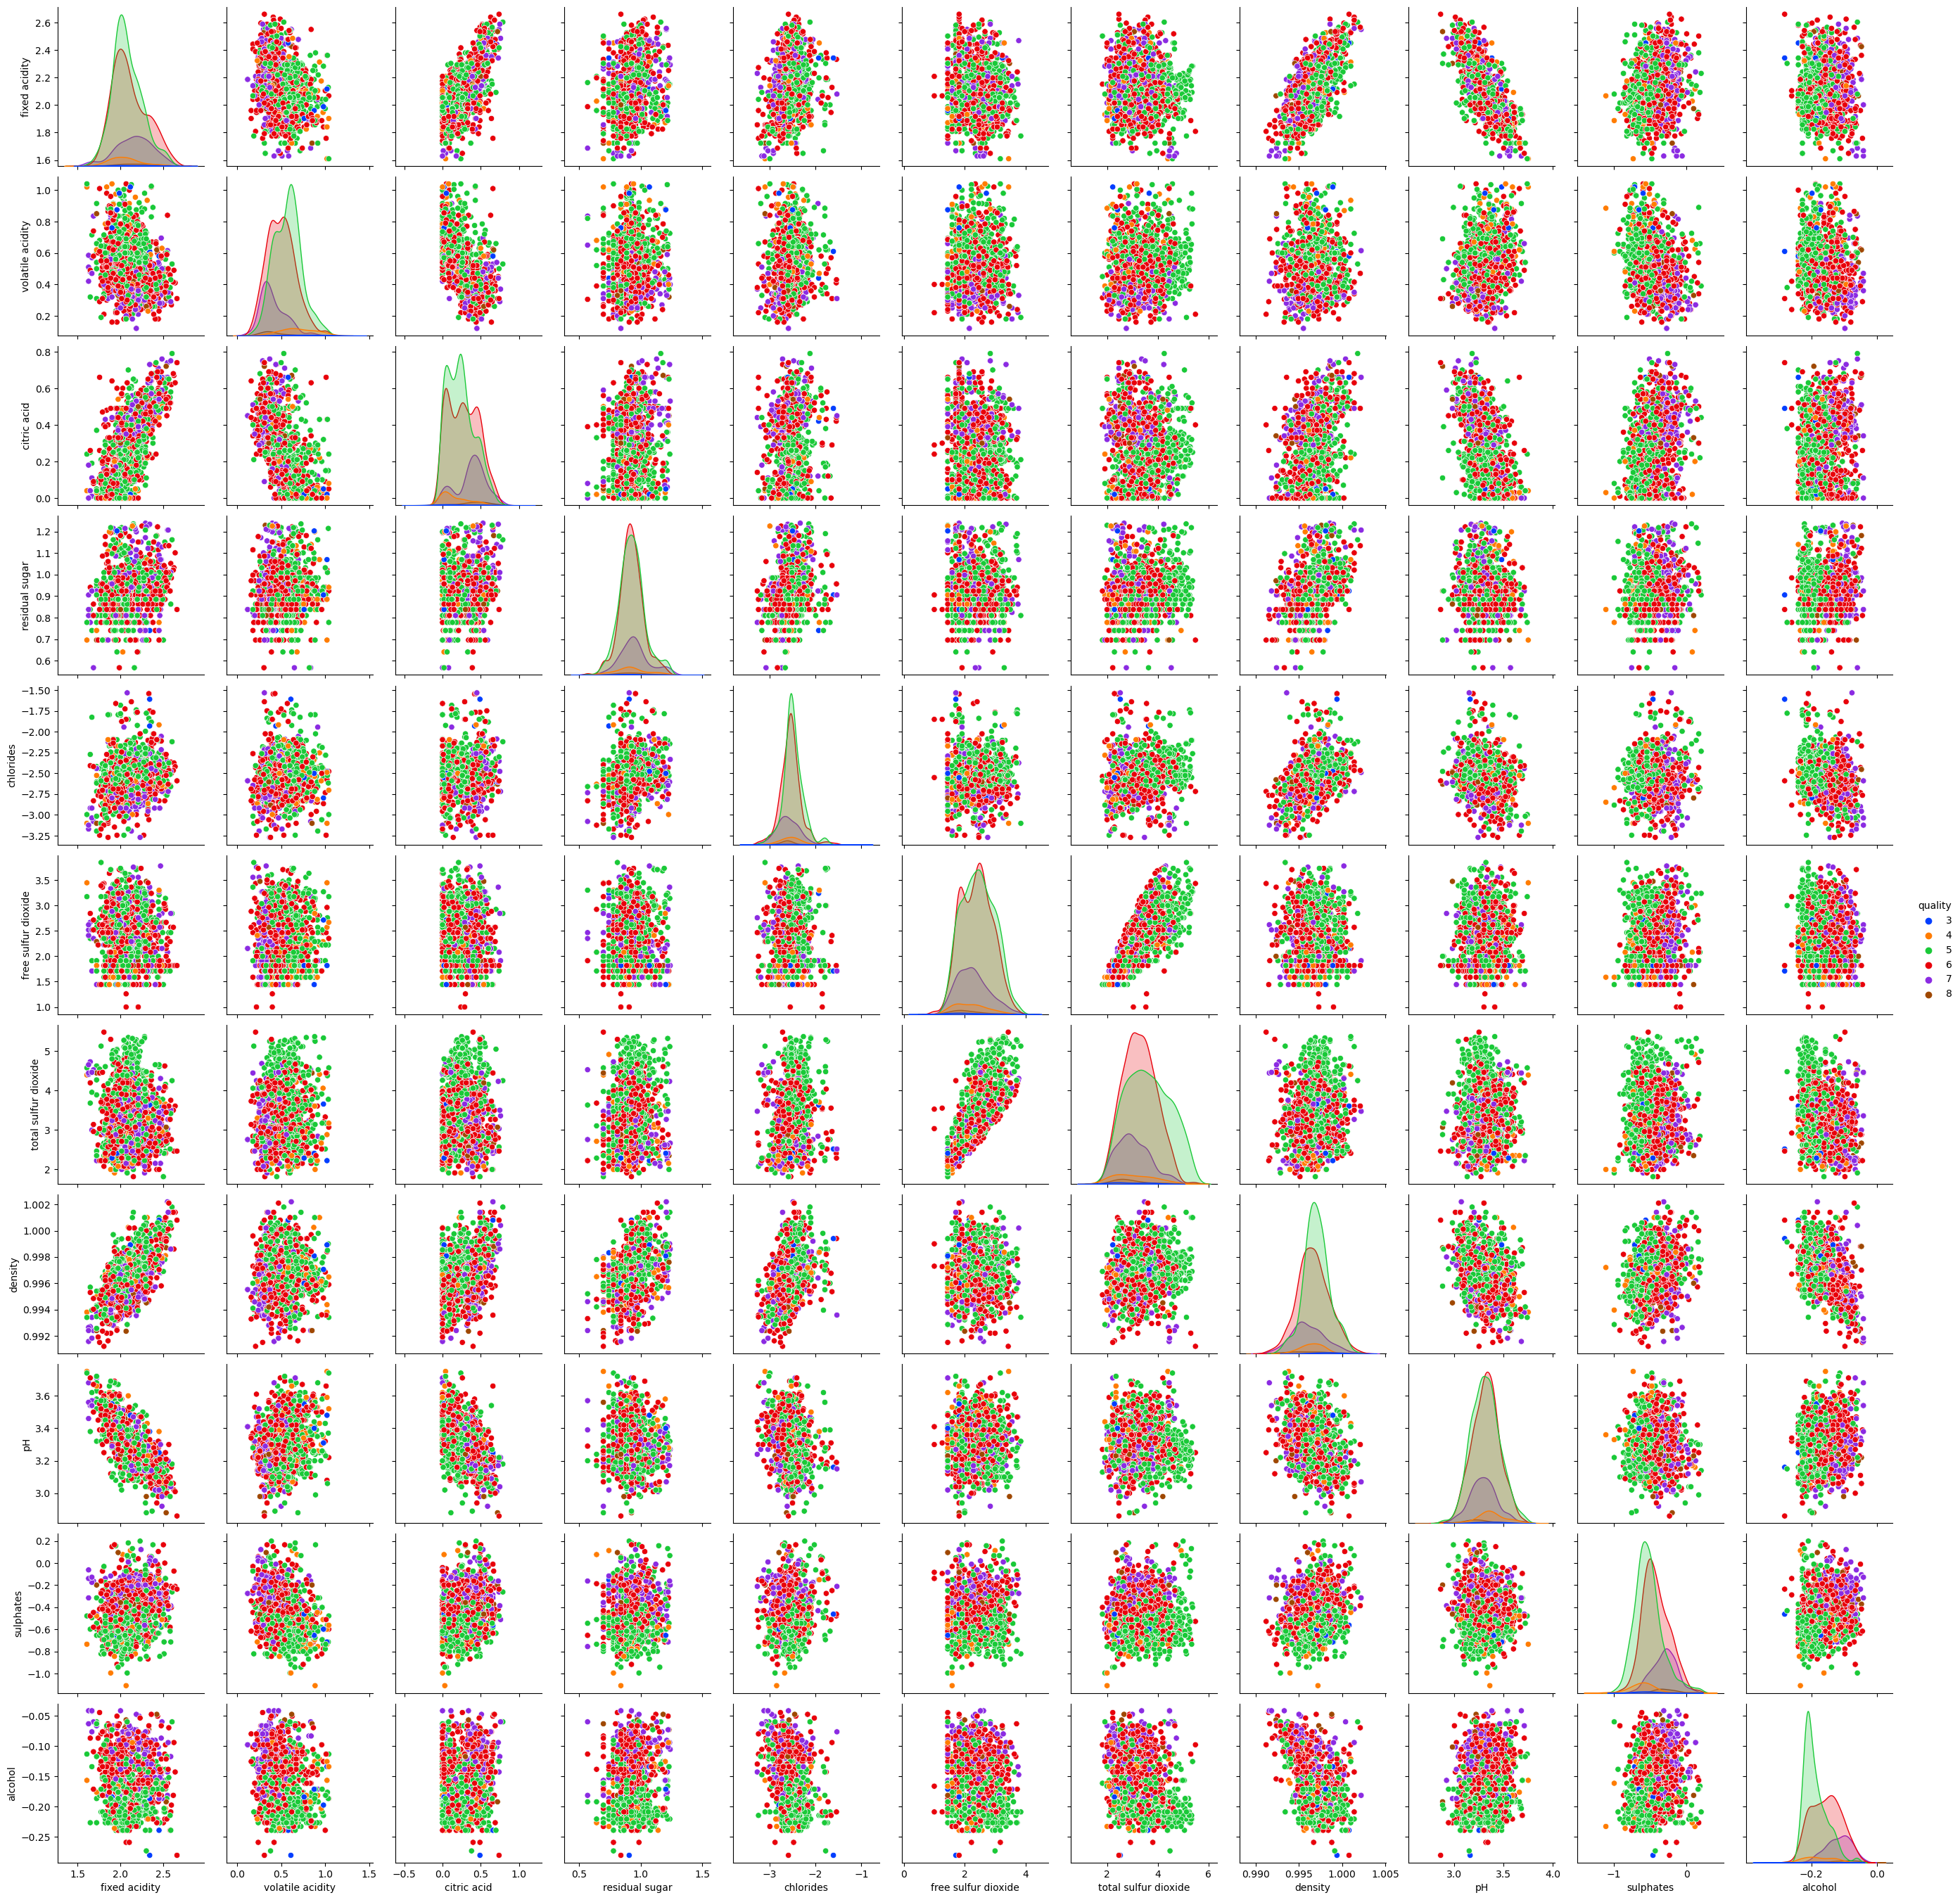

In [296]:
sns.pairplot(df, hue = "quality", palette = "bright")
plt.show()

#### Correlation between target variable and independent variables.

In [298]:
# Checking the correlation between features and the target.
cor = df.corr()
cor

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.287236     0.694158   
volatile acidity          -0.287236          1.000000    -0.582082   
citric acid                0.694158         -0.582082     1.000000   
residual sugar             0.211875          0.049285     0.180855   
chlorides                  0.232516          0.091388     0.100723   
free sulfur dioxide       -0.165815          0.037626    -0.101623   
total sulfur dioxide      -0.099521          0.111397    -0.014188   
density                    0.670258          0.005391     0.378011   
pH                        -0.717735          0.245203    -0.526005   
sulphates                  0.202707         -0.336942     0.311731   
alcohol                   -0.041703         -0.209086     0.154994   
quality                    0.132022         -0.369249     0.239909   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.211875   0.232516            -0.165815   
volatile acidity            0.049285   0.091388             0.037626   
citric acid                 0.180855   0.100723            -0.101623   
residual sugar              1.000000   0.223348             0.045863   
chlorides                   0.223348   1.000000             0.003363   
free sulfur dioxide         0.045863   0.003363             1.000000   
total sulfur dioxide        0.135546   0.109207             0.754334   
density                     0.405444   0.390289            -0.038361   
pH                         -0.079326  -0.207262             0.124360   
sulphates                   0.081869   0.019616             0.054777   
alcohol                     0.139323  -0.254301            -0.089202   
quality                     0.037157  -0.159297            -0.069202   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.099521  0.670258 -0.717735   0.202707   
volatile acidity                  0.111397  0.005391  0.245203  -0.336942   
citric acid                      -0.014188  0.378011 -0.526005   0.311731   
residual sugar                    0.135546  0.405444 -0.079326   0.081869   
chlorides                         0.109207  0.390289 -0.207262   0.019616   
free sulfur dioxide               0.754334 -0.038361  0.124360   0.054777   
total sulfur dioxide              1.000000  0.130812  0.011055   0.006249   
density                           0.130812  1.000000 -0.317023   0.161419   
pH                                0.011055 -0.317023  1.000000  -0.041187   
sulphates                         0.006249  0.161419 -0.041187   1.000000   
alcohol                          -0.271809 -0.455406  0.147228   0.239500   
quality                          -0.210583 -0.174804 -0.079059   0.376011   

                       alcohol   quality  
fixed acidity        -0.041703  0.132022  
volatile acidity     -0.209086 -0.369249  
citric acid           0.154994  0.239909  
residual sugar        0.139323  0.037157  
chlorides            -0.254301 -0.159297  
free sulfur dioxide  -0.089202 -0.069202  
total sulfur dioxide -0.271809 -0.210583  
density              -0.455406 -0.174804  
pH                    0.147228 -0.079059  
sulphates             0.239500  0.376011  
alcohol               1.000000  0.497799  
quality               0.497799  1.000000

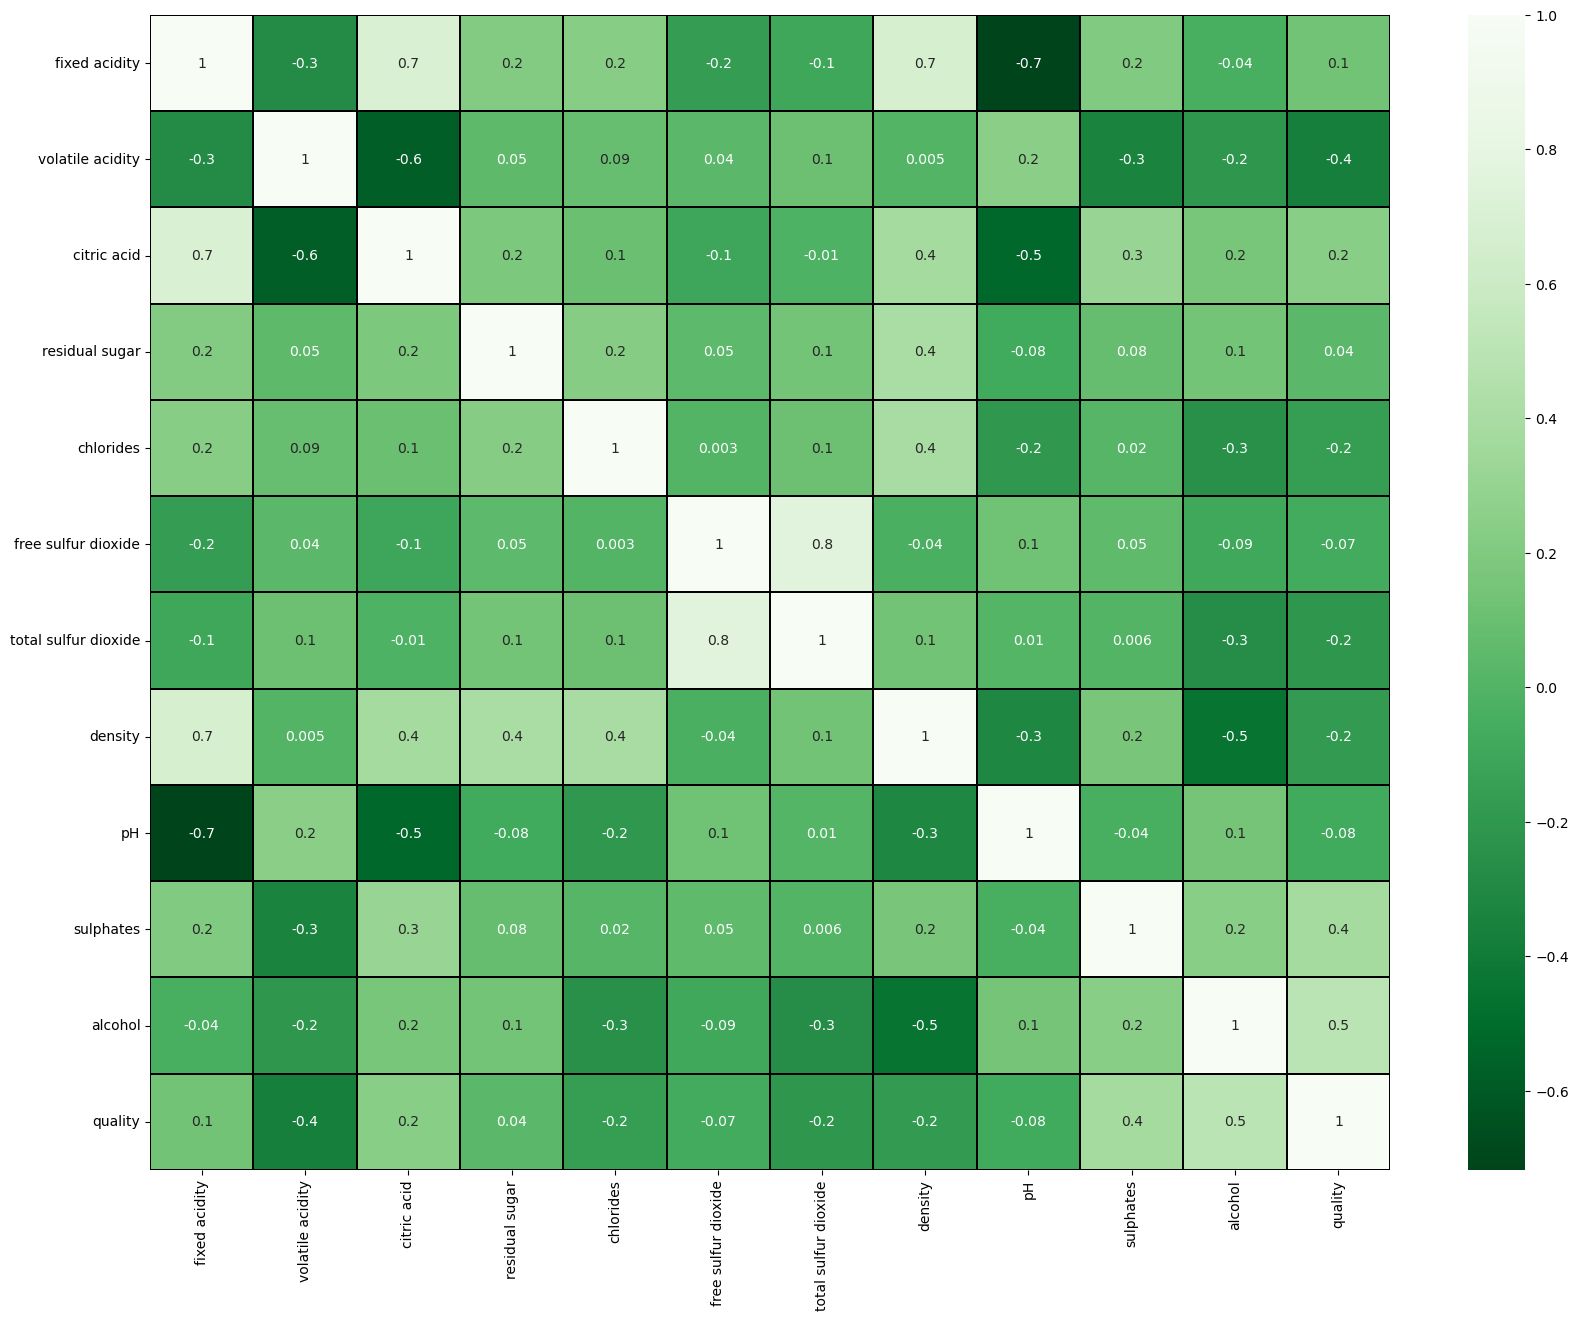

In [299]:
# Visualizing the correlation matrix by plotting heatmap

plt.figure(figsize = (20, 15))
sns.heatmap(cor, linewidths = 0.1, fmt = ".1g", linecolor = 'black', annot = True, cmap = 'Greens_r')
plt.yticks(rotation = 0)
plt.show()

This heatmap shows the correlation matrix. We can observe the relation between feature to feature and feature to label. 
- This heatmap contains both positive and negative correlation.
- The target have more correlation with alcohol(+) and volatile acidity(-).
- The columns alcohol (0.5), sulphates (0.4), citric acid(0.2), fixed acidity (0.1), and residual sugar(0.04) have positive correlation with the label quality.
- The label is negative correlated with volatile acidity(-0.4), chlorides(-0.2), total sulfur dioxide(-0.2), density (-0.2), ph(-0.08), and free sulfur dioxide (-0.07).
- The column fixed acidity and density(0.7), fixed acidity and citric acid(0.7), and fixed acidity and ph(-0.7) have high correlation with each other.

In [300]:
cor['quality'].sort_values(ascending = False).to_frame()

quality
quality               1.000000
alcohol               0.497799
sulphates             0.376011
citric acid           0.239909
fixed acidity         0.132022
residual sugar        0.037157
free sulfur dioxide  -0.069202
pH                   -0.079059
chlorides            -0.159297
density              -0.174804
total sulfur dioxide -0.210583
volatile acidity     -0.369249

We can observe the positive and negative correlated features with the target.

Notes:

- Maximum positive correlation is with alcohol 0.4977
- Maximum negative correlation is with volatile acidity -0.3692
- Maximum positive correlation is around 50% and maximun negative correlation is basically 37%

### Separating features and label

In [301]:
x = df.drop('quality', axis = 1)
y = df['quality']

#### Feature Scaling using Standard Scalarization

In [302]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.514456          1.030995    -1.389338       -0.597553  -0.185469   
1         -0.241171          2.087879    -1.389338        0.549243   0.921416   
2         -0.241171          1.383290    -1.180946        0.136149   0.646348   
3          1.636963         -1.435070     1.528149       -0.597553  -0.243136   
4         -0.514456          1.030995    -1.389338       -0.597553  -0.185469   
...             ...               ...          ...             ...        ...   
1485      -1.432943          0.443836    -0.972554       -0.387655   0.550656   
1486      -1.690412          0.150257    -0.868358       -0.023627  -1.071898   
1487      -1.349882         -0.084606    -0.712064        0.136149  -0.185469   
1488      -1.690412          0.708058    -0.764162       -0.387655  -0.243136   
1489      -1.603163         -1.258922     1.059268        1.496809  -0.734225   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0               -0.302985             -0.182867  0.610687  1.376942   
1                1.030028              0.875324  0.037658 -0.806407   
2                0.158274              0.512544  0.152264 -0.383823   
3                0.358348              0.686482  0.725293 -1.088129   
4               -0.302985             -0.182867  0.610687  1.376942   
...                   ...                   ...       ...       ...   
1485             1.507573              0.191438 -1.051096  0.954358   
1486             1.919660              0.420707 -0.925030  1.447373   
1487             1.312420              0.049310 -0.569752  0.743067   
1488             1.507573              0.191438 -0.724470  1.799526   
1489             0.452529              0.121502 -0.713009  0.531775   

      sulphates   alcohol  
0     -0.613778 -1.054998  
1      0.357990 -0.574565  
2      0.132158 -0.574565  
3     -0.438143 -0.574565  
4     -0.613778 -1.054998  
...         ...       ...  
1485  -0.438143  0.179645  
1486   0.914684  0.842929  
1487   0.848391  0.661605  
1488   0.574071 -0.131264  
1489   0.208573  0.661605  

[1490 rows x 11 columns]

We have scaled the data using the Standard Scalarization method to overcome the issue of biases.

In [305]:
df_scaled = pd.concat([x,y], axis=1)
df_scaled.to_csv('datasets/winequality-red_standard.csv')

#### Checking Variance Inflation Factor (VIF)


In [309]:
# Finding variance inflation factor in each scaled column 

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

Features  VIF values
0          fixed acidity    7.890053
7                density    6.639567
8                     pH    3.315400
10               alcohol    3.187009
2            citric acid    3.127215
6   total sulfur dioxide    2.956020
5    free sulfur dioxide    2.619200
1       volatile acidity    1.838221
3         residual sugar    1.796567
9              sulphates    1.351957
4              chlorides    1.239675

By checking VIF values we observe the features `fixed acidity` and `density` are highly correlated since VIF is between 5 and 10.
We will drop the `fixed acidity` column first, and then check if the multicollinearity issue persists.

In [310]:
# Dropping fixed acidity column
x.drop('fixed acidity', axis=1, inplace=True)

In [313]:
# Again checking VIF value to review if the multicollinearity still exists or not 
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif.sort_values(by='VIF values', ascending=False)

Features  VIF values
1           citric acid    2.841808
5  total sulfur dioxide    2.827728
6               density    2.802795
4   free sulfur dioxide    2.576141
9               alcohol    2.388284
0      volatile acidity    1.837881
2        residual sugar    1.585299
7                    pH    1.548510
8             sulphates    1.330636
3             chlorides    1.234613

As we can see removing the `fixed acidity` column solved the multicollinearit issue. We can continue with model building.

### Oversampling
Now we are going to resolve the imbalance issue. Since our problem is classification, we will balance the data using oversampling method.

In [315]:
# Frequency table of quality.
y.value_counts()

5    637
6    596
7    187
4     47
8     16
3      7
Name: quality, dtype: int64

In [316]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1, y1 = SM.fit_resample(x, y)

In [344]:
# Comparing the new frequency table with samples.
y1.value_counts()

5    637
6    637
7    637
4    637
8    637
3    637
Name: quality, dtype: int64

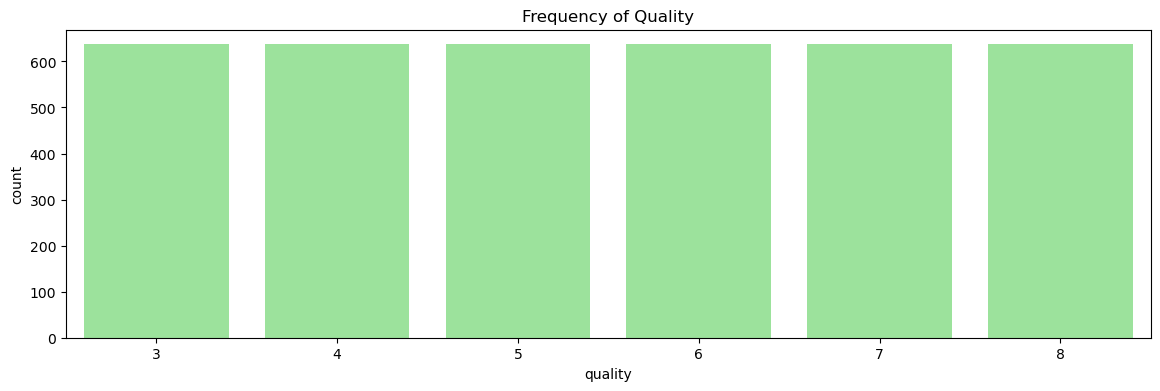

In [343]:
# Setting new balanced dataset
df_balanced = pd.concat([x1, y1], axis=1)

# Visualizing the Frequency of quality
plt.figure(figsize = (14, 4), facecolor = "white")
sns.countplot(data=df_balanced, x='quality', color='lightgreen')
plt.title(f"Frequency of Quality")
plt.show()

Since the data is balanced, we can build machine learning classification models.

### cutoff for your dependent variable (wine quality) 
e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'. 

In [350]:
df_balanced.sort_values(by='quality', ascending=False)

volatile acidity  citric acid  residual sugar  chlorides  \
3821         -1.184515     0.622572       -0.636186  -0.854342   
3505         -1.076801     0.903884       -0.189022  -0.812622   
3477         -0.633365     0.741631       -0.831287  -0.637203   
3476         -1.204385     1.467856        0.692220  -0.186422   
3475         -0.960754     0.193962       -0.831287  -0.305098   
...                ...          ...             ...        ...   
1698          1.783801    -1.236683       -0.634750  -0.404232   
1699          2.844462    -1.241595        0.913860  -0.137840   
1700          0.419348     0.242517       -1.298735   1.539232   
1701          0.456475     1.146629       -0.268867   3.962567   
1911          1.587375    -0.264418        1.880623   0.023790   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
3821            -1.617203             -1.257303 -0.364779 -0.732738   
3505            -1.510719             -1.206960 -0.041965 -0.905502   
3477            -1.046163             -1.354846 -0.955644  0.079460   
3476            -1.156434             -1.068847 -0.014708 -1.158560   
3475             0.333851             -0.649226 -1.453132 -0.528813   
...                   ...                   ...       ...       ...   
1698            -0.547959             -0.859348 -0.234211  1.134570   
1699            -0.601660             -0.975561  0.953915  0.832047   
1700             1.342389              0.334505  0.698654  0.319074   
1701            -1.147295             -1.043296  1.498965 -1.016603   
1911            -1.422678             -0.830988  1.195095  0.314842   

      sulphates   alcohol  quality  
3821   2.546850  0.046935        8  
3505   1.314771  0.207905        8  
3477   0.431058  1.377663        8  
3476   1.200169  1.035739        8  
3475   0.501668  1.035268        8  
...         ...       ...      ...  
1698  -0.235007 -0.493150        3  
1699  -1.121027  0.284738        3  
1700   0.887746 -0.526981        3  
1701   0.047640 -2.366072        3  
1911  -0.859707 -0.524824        3  

[3822 rows x 11 columns]

In [351]:
# Cut off the label
df_balanced['quality_b'] = df_balanced['quality'].apply(lambda val: 1 if val >= 7 else 0)
df_balanced.sort_values(by='quality', ascending=False)

volatile acidity  citric acid  residual sugar  chlorides  \
3821         -1.184515     0.622572       -0.636186  -0.854342   
3505         -1.076801     0.903884       -0.189022  -0.812622   
3477         -0.633365     0.741631       -0.831287  -0.637203   
3476         -1.204385     1.467856        0.692220  -0.186422   
3475         -0.960754     0.193962       -0.831287  -0.305098   
...                ...          ...             ...        ...   
1698          1.783801    -1.236683       -0.634750  -0.404232   
1699          2.844462    -1.241595        0.913860  -0.137840   
1700          0.419348     0.242517       -1.298735   1.539232   
1701          0.456475     1.146629       -0.268867   3.962567   
1911          1.587375    -0.264418        1.880623   0.023790   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
3821            -1.617203             -1.257303 -0.364779 -0.732738   
3505            -1.510719             -1.206960 -0.041965 -0.905502   
3477            -1.046163             -1.354846 -0.955644  0.079460   
3476            -1.156434             -1.068847 -0.014708 -1.158560   
3475             0.333851             -0.649226 -1.453132 -0.528813   
...                   ...                   ...       ...       ...   
1698            -0.547959             -0.859348 -0.234211  1.134570   
1699            -0.601660             -0.975561  0.953915  0.832047   
1700             1.342389              0.334505  0.698654  0.319074   
1701            -1.147295             -1.043296  1.498965 -1.016603   
1911            -1.422678             -0.830988  1.195095  0.314842   

      sulphates   alcohol  quality  quality_b  
3821   2.546850  0.046935        8          1  
3505   1.314771  0.207905        8          1  
3477   0.431058  1.377663        8          1  
3476   1.200169  1.035739        8          1  
3475   0.501668  1.035268        8          1  
...         ...       ...      ...        ...  
1698  -0.235007 -0.493150        3          0  
1699  -1.121027  0.284738        3          0  
1700   0.887746 -0.526981        3          0  
1701   0.047640 -2.366072        3          0  
1911  -0.859707 -0.524824        3          0  

[3822 rows x 12 columns]

##  Modeling

### Finding the best random state

In [352]:
X = df_balanced.drop(['quality', 'quality_b'], axis = 1)
Y = df_balanced['quality_b']

In [355]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def find_best_random_state(model, x, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_random_state = i
            
    return [best_random_state, best_acc]


# Build the model
model = RandomForestClassifier()
random_state, acc = find_best_random_state(model, X, Y) 
print(f"Best accuracy is {round(acc,4)} at random_state {random_state}")

Best accuracy is 0.9686 at random_state 130


#### Creating train test split

In [357]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=random_state)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

x_train shape:  (2675, 10)
x_test shape:   (1147, 10)
y_train shape:  (2675,)
y_test shape:   (1147,)


### Classification Algorithms

In [358]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [376]:
# Functions 
def calc_accuracy(model):
    ''' Calculate the accuracy of the model. Return the accuracy and the predicted values.'''
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\nModel: {model}")
    print(f"Confusion matrix: {confusion_matrix(y_test, y_pred)}")
    print(f"Classification report: {classification_report(y_test, y_pred)}" )
    print(f"The accuracy score using {model} is {round(acc*100.0, 2)}%")
    return [acc, y_pred]

Searching for the model with the best accuracy. We define a dictionary with all the models to implement.

In [378]:
models = {'rfc' : RandomForestClassifier(), 
          'etc': ExtraTreesClassifier(),
          'lg': LogisticRegression(),
          'svc': SVC(),
          'gbc': GradientBoostingClassifier(), 
          'abc': AdaBoostClassifier(), 
          'bc': BaggingClassifier()}
accuracy = {}
y_pred = {}

for id_model, model in models.items():
    acc, pred = calc_accuracy(model)
    accuracy[id_model] = acc
    y_pred[id_model] = pred
    


Model: RandomForestClassifier()
Confusion matrix: [[751  18]
 [ 23 355]]
Classification report:               precision    recall  f1-score   support

           0       0.97      0.98      0.97       769
           1       0.95      0.94      0.95       378

    accuracy                           0.96      1147
   macro avg       0.96      0.96      0.96      1147
weighted avg       0.96      0.96      0.96      1147

The accuracy score using RandomForestClassifier() is 96.43%

Model: ExtraTreesClassifier()
Confusion matrix: [[756  13]
 [  7 371]]
Classification report:               precision    recall  f1-score   support

           0       0.99      0.98      0.99       769
           1       0.97      0.98      0.97       378

    accuracy                           0.98      1147
   macro avg       0.98      0.98      0.98      1147
weighted avg       0.98      0.98      0.98      1147

The accuracy score using ExtraTreesClassifier() is 98.26%

Model: LogisticRegression()
Confusi

In [381]:
accuracy

{'rfc': 0.9642545771578029,
 'etc': 0.9825632083696599,
 'lg': 0.909328683522232,
 'svc': 0.944202266782912,
 'gbc': 0.939843068875327,
 'abc': 0.9154315605928509,
 'bc': 0.9546643417611159}

The model with best accuracy is 'etc' ExtraTreesClassifier with 98.26% of accuracy.

### Hyper Parameter Tuning

In [383]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter search space
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'log2', None],
    'criterion': ['gini', 'entropy']
}

# Build the el modelo ExtraTreesClassifier
model = ExtraTreesClassifier()

# Perform search with cross validation
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [384]:
best_params

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

These are the best parameters for training the model.

In [385]:
best_model = ExtraTreesClassifier(criterion = 'entropy', max_depth = 20, max_features = 'auto', min_samples_leaf = 1,
                                  min_samples_split = 2, n_estimators = 50, n_jobs=-2, random_state=130)
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(f"accuracy_score: {round(acc*100,2)}%")

accuracy_score: 98.17%


### Plotting ROC and compare AUC for  the best model 

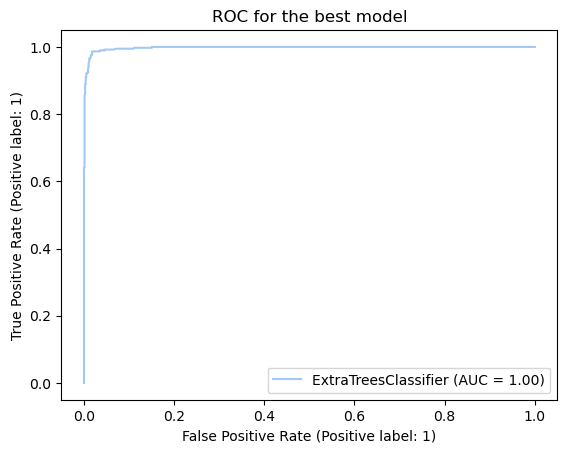

In [386]:
# Plotting for all the models used here
from sklearn.metrics import plot_roc_curve

# Let's check the AUC for the best model after hyer parameter tuning
plot_roc_curve(best_model, x_test, y_test)
plt.title("ROC for the best model")
plt.show() 

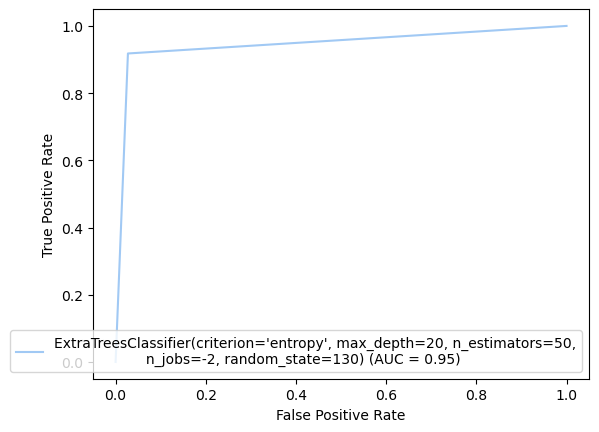

In [392]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=best_model)
display.plot()

Here we have plotted the ROC curve for the final model and the AUC value for the best model is 95%.

### Saving the model

In [387]:
# Saving the model using .pkl
import joblib
joblib.dump(best_model, "Red_Wine_Quality_Analysis.pkl")

['Red_Wine_Quality_Analysis.pkl']

### Predicting the saved model

In [398]:
# Lets load the saved model and get the predictions
model = joblib.load("Red_Wine_Quality_Analysis.pkl")

# Prediction
prediction = model.predict(x_test)

# Accuracy score of the prediction with the model selected
print(f"Accuracy score: {round(accuracy_score(y_test, prediction),4)}")

# Dataframe to compare the predicted values vs the original values
df_result = pd.DataFrame()
df_result['Predicted'] = prediction
df_result['Original'] = np.array(y_test)
df_result.T

Accuracy score: 0.9817


0     1     2     3     4     5     6     7     8     9     ...  \
Predicted     1     0     1     1     0     0     1     0     0     0  ...   
Original      1     0     1     1     0     0     1     0     0     1  ...   

           1137  1138  1139  1140  1141  1142  1143  1144  1145  1146  
Predicted     0     0     0     0     0     0     1     0     0     1  
Original      0     0     0     0     0     0     1     0     0     1  

[2 rows x 1147 columns]

These are the predicted values of the quality of the wine in a dataset to compared the prediction with the test data.